In [56]:
# importing necessary libraries
import numpy as np
import pandas as pd
import sklearn
import warnings

In [57]:
# importing modules for data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.datetime import DatetimeFeatures

In [64]:
# importing different regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [66]:
# importing modules to display learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

In [58]:
sklearn.set_config(transform_output="pandas")

warnings.filterwarnings("ignore")

In [7]:
train_data = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\flightpriceprediction\data\train.csv")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Spicejet,2019-04-24,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No check-in baggage included,3841
1,Indigo,2019-06-06,Banglore,Delhi,00:25:00,03:15:00,170,0.0,No Info,3943
2,Indigo,2019-05-09,Delhi,Cochin,04:55:00,21:00:00,965,1.0,No Info,6979
3,Jet Airways,2019-05-21,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included,12898
4,Jet Airways,2019-03-01,Banglore,New Delhi,05:45:00,21:20:00,935,1.0,No Info,27992


In [8]:
val_data = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\flightpriceprediction\data\val.csv")
val_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Multiple Carriers,2019-03-01,Delhi,Cochin,00:20:00,13:20:00,780,1.0,No Info,29528
1,Indigo,2019-05-27,Mumbai,Hyderabad,02:35:00,04:05:00,90,0.0,No Info,2754
2,Jet Airways,2019-06-09,Delhi,Cochin,09:00:00,04:25:00,1165,1.0,In-flight meal not included,10262
3,Jet Airways,2019-06-09,Delhi,Cochin,15:00:00,12:35:00,1295,1.0,In-flight meal not included,10262
4,Vistara,2019-05-06,Kolkata,Banglore,07:10:00,23:25:00,975,1.0,No Info,8085


In [9]:
test_data = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\flightpriceprediction\data\test.csv")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,2019-04-21,Banglore,Delhi,08:20:00,11:20:00,180,0.0,No Info,7229
1,Multiple Carriers,2019-05-09,Delhi,Cochin,07:00:00,19:00:00,720,1.0,No Info,10197
2,Jet Airways,2019-03-21,Delhi,Cochin,16:10:00,18:50:00,1600,2.0,No Info,13180
3,Jet Airways,2019-03-09,Delhi,Cochin,13:55:00,04:25:00,870,2.0,No Info,17229
4,Jet Airways,2019-06-03,Delhi,Cochin,18:15:00,12:35:00,1100,1.0,In-flight meal not included,10262


In [10]:
def splitdata(data):
    X = data.drop(columns="Price")
    y = data.Price.copy()

    return (X, y)

In [11]:
X_train, y_train = splitdata(train_data)
print(X_train.shape, y_train.shape)

(640, 9) (640,)


In [12]:
X_val, y_val = splitdata(val_data)
print(X_val.shape, y_val.shape)

(160, 9) (160,)


In [13]:
X_test, y_test = splitdata(test_data)
print(X_test.shape, y_test.shape)

(200, 9) (200,)


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          640 non-null    object 
 1   Date_of_Journey  640 non-null    object 
 2   Source           640 non-null    object 
 3   Destination      640 non-null    object 
 4   Dep_Time         640 non-null    object 
 5   Arrival_Time     640 non-null    object 
 6   Duration         640 non-null    int64  
 7   Total_Stops      639 non-null    float64
 8   Additional_Info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


In [16]:
y_train

0       3841
1       3943
2       6979
3      12898
4      27992
       ...  
635     3873
636     3100
637     6478
638    10262
639     4340
Name: Price, Length: 640, dtype: int64

# DATA PREPROCESSING

In [17]:
X_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Spicejet,2019-04-24,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No check-in baggage included
1,Indigo,2019-06-06,Banglore,Delhi,00:25:00,03:15:00,170,0.0,No Info


In [18]:
num_cols = ["Duration","Total_Stops"]

In [19]:
cat_cols = ["Airline","Source","Destination","Additional_Info"]

In [20]:
dt_cols = [col for col in X_train.columns if (col not in num_cols) and (col not in cat_cols)]

In [28]:
num_transformer = Pipeline(steps=[
    ("imputation",SimpleImputer(strategy="median")),
    ("scaling",StandardScaler())])

In [30]:
cat_transformer = Pipeline(steps=[
    ("imputation", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse_output=False))])

In [36]:
doj_transformer = Pipeline(steps=[
    ("imputation", SimpleImputer(strategy="most_frequent")),
    ("extract", DatetimeFeatures(features_to_extract=["month","week","day_of_week","day_of_month"])),
    ("scaling",StandardScaler())])

In [37]:
time_transformer = Pipeline(steps=[
    ("imputation", SimpleImputer(strategy="most_frequent")),
    ("extract", DatetimeFeatures(features_to_extract=["hour","minute"])),
    ("scaling",StandardScaler())])

In [38]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols),
    ("doj", doj_transformer, ["Date_of_Journey"]),
    ("time",time_transformer, ["Dep_Time","Arrival_Time"])
])

In [54]:
preprocessor.fit_transform(X_train)

,num__Duration,num__Total_Stops,cat__Airline_Air Asia,cat__Airline_Air India,cat__Airline_Goair,cat__Airline_Indigo,cat__Airline_Jet Airways,cat__Airline_Multiple Carriers,cat__Airline_Spicejet,cat__Airline_Vistara,...,cat__Additional_Info_No Info,cat__Additional_Info_No check-in baggage included,doj__Date_of_Journey_month,doj__Date_of_Journey_week,doj__Date_of_Journey_day_of_week,doj__Date_of_Journey_day_of_month,time__Dep_Time_hour,time__Dep_Time_minute,time__Arrival_Time_hour,time__Arrival_Time_minute
0,-0.985555,-1.280928,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.545431,-0.216529,-0.431095,1.260777,-1.149230,1.681534,-0.648747,0.312267
1,-0.954913,-1.280928,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.128793,0.910126,0.066921,-0.872617,-2.224010,0.065241,-1.528715,-0.583924
2,0.669113,0.295599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.291681,0.159023,0.066921,-0.517052,-1.507490,1.681534,1.111188,-1.480116
3,0.618043,0.295599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.291681,0.534574,-0.929110,0.905211,1.358588,1.681534,-0.208763,0.610997
4,0.607829,0.295599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-1.382543,-1.718736,0.564936,-1.465227,-1.328360,1.142770,1.111188,-0.285194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.995769,-1.280928,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-0.545431,-0.779857,1.062952,-0.872617,0.821199,-0.742906,0.817866,0.909727
636,-1.138765,-1.280928,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.545431,-0.779857,-0.431095,-1.228183,-1.149230,-0.204141,-0.942070,0.909727
637,-0.965127,-1.280928,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.128793,1.285678,-0.929110,0.549645,-1.149230,-1.281670,-0.795408,1.208458
638,0.750825,0.295599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.128793,0.910126,-1.427125,-1.228183,-1.865750,-0.473523,0.817866,-1.480116


# MODEL SELECTION using learning curve 

In [79]:
algorithms = {"linear regression": LinearRegression(),
             "svr": SVR(),
             "random fr regressor": RandomForestRegressor(n_estimators=10),
             "xgbregressor": XGBRegressor(n_estimators=10)}

In [72]:
X_data = pd.concat([X_train,X_val],axis=0)
y_data = pd.concat([y_train,y_val],axis=0)
print(X_data.shape, y_data.shape)

(800, 9) (800,)


In [112]:
def plotcurves(sizes, meanscores, stdscores,label, ax):
    ax.plot(
        sizes,
        meanscores,
        stdscores,
        label=label,
        marker="o"
    )

    ax.fill_between(
        x = sizes,
        y1= meanscores - stdscores,
        y2= meanscores + stdscores,
        alpha=0.5
    )

In [110]:
def plot_learncurve(name, algo):
    
    model = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("algorithm", algo)])

    train_sizes, train_scores, test_scores = learning_curve(
        estimator = model,
        X=X_data,
        y=y_data,
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42
    ) 

    mean_train_score = np.mean(train_scores,axis=1)
    std_train_score = np.std(train_scores,axis=1)
    train_spread = f"{mean_train_score[-1]:2f} +/- {std_train_score[-1]:2f}"
    

    mean_test_score = np.mean(test_scores,axis=1)
    std_test_score = np.std(test_scores,axis=1)  
    test_spread = f"{mean_test_score[-1]:2f} +/- {std_test_score[-1]:2f}"

    fig, ax = plt.subplots(figsize=[12,4])

    #training_curve
    plotcurves(train_sizes, 
               mean_train_score, 
               std_train_score, 
               f"Train({train_spread})", ax)
    
    #testing_curve
    plotcurves(train_sizes, 
               mean_train_score, 
               std_train_score, 
               f"Test({test_spread})", ax)

    ax.set(xlabel="Training set sizes",
             ylabel="R-square score",
             title=name)
    
    ax.legend(loc="lower right")

    plt.show()

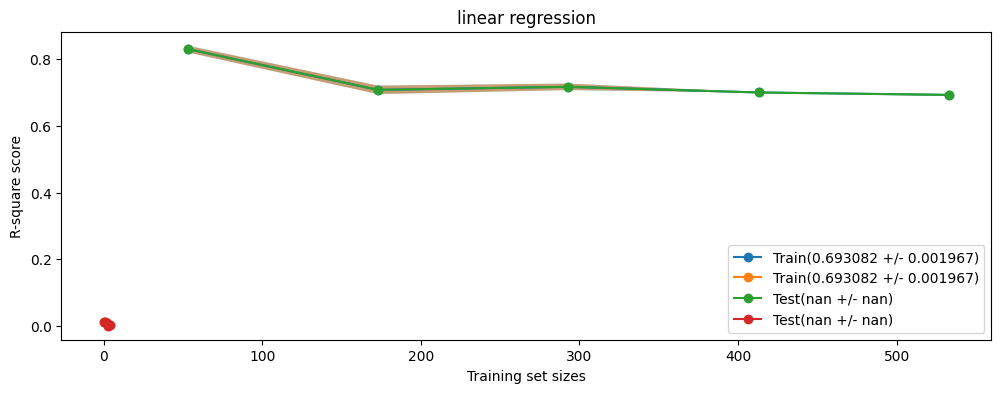

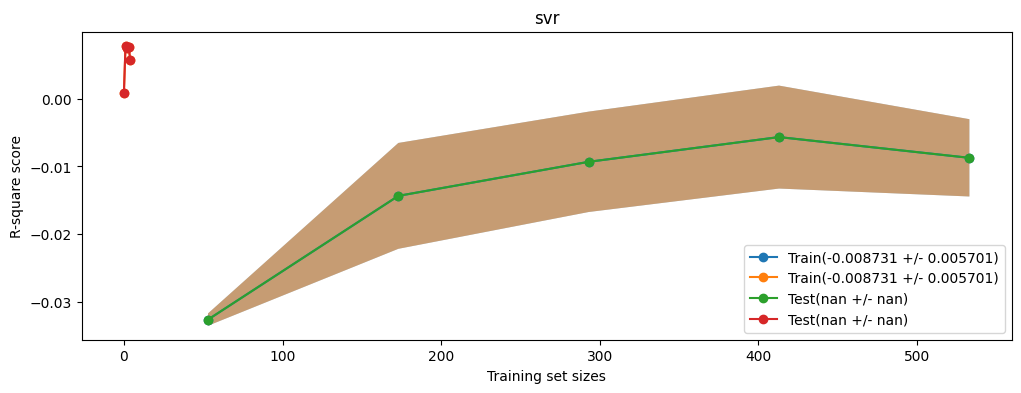

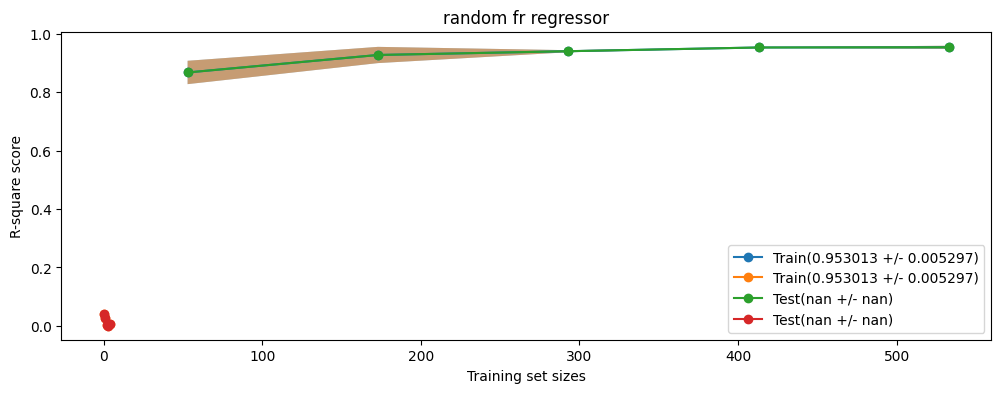

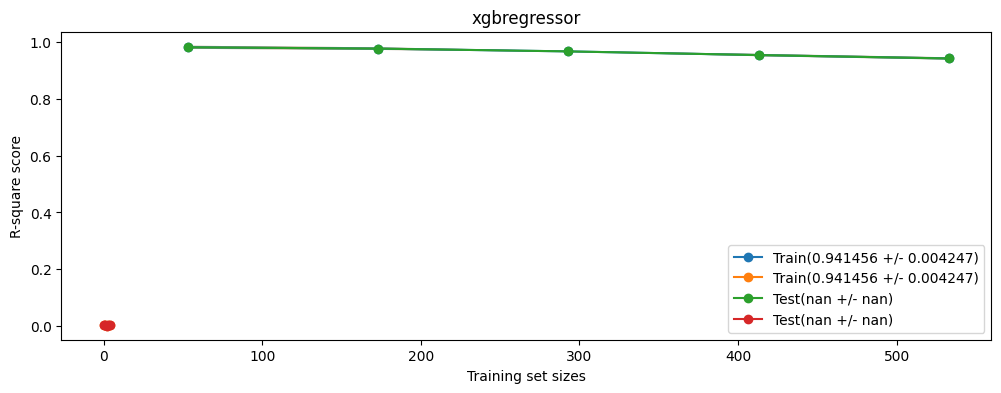

In [113]:
for name,algo in algorithms.items():
    plot_learncurve(name, algo)

In [118]:
f_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("rfr",RandomForestRegressor(n_estimators=10))])

In [119]:
f_model.fit(X_data, y_data)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Total_Stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Airline', 'Source',
                                                   'Destin...
                                                                   DatetimeFeatures(features_to_extract=['month',
                                                                                                         'week',
                                                                                                         'day_of_week',
                                                                                                         'day_of_month'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Date_of_Journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extract',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Dep_Time',
                                                   'Arrival_Time'])])),
                ('rfr', RandomForestRegressor(n_estimators=10))])

# MODEL EVALUATION via metrics

In [120]:
def evaluation(X, y):
    y_pred = f_model.predict(X)

    return r2_score(y, y_pred)

In [121]:
evaluation(X_data, y_data)

0.9597584521397643

Evaluating on test data

In [122]:
evaluation(X_test, y_test)

0.8204656559344307

# MODEL PERSISTENCE
Saving the model

In [123]:
import joblib

In [124]:
joblib.dump(f_model, "model.joblib")

['model.joblib']

In [125]:
savedmodel = joblib.load("model.joblib")
savedmodel

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Total_Stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Airline', 'Source',
                                                   'Destin...
                                                                   DatetimeFeatures(features_to_extract=['month',
                                                                                                         'week',
                                                                                                         'day_of_week',
                                                                                                         'day_of_month'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Date_of_Journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extract',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Dep_Time',
                                                   'Arrival_Time'])])),
                ('rfr', RandomForestRegressor(n_estimators=10))])

In [126]:
y_pred = savedmodel.predict(X_data)
r2_score(y_data, y_pred)

0.9597584521397643